In [1]:
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import ensemble
from sklearn.model_selection import cross_val_score

%matplotlib inline

In [2]:
y2015 = pd.read_csv("LoanStats3d.csv", skipinitialspace=True, header=1)
y2015.head()

C:\Users\andre\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2698: DtypeWarning: Columns (0,19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,68009401,72868139.0,16000.0,16000.0,16000.0,60 months,14.85%,379.39,C,C5,...,0.0,2.0,78.9,0.0,0.0,2.0,298100.0,31329.0,281300.0,13400.0
1,68354783,73244544.0,9600.0,9600.0,9600.0,36 months,7.49%,298.58,A,A4,...,0.0,2.0,100.0,66.7,0.0,0.0,88635.0,55387.0,12500.0,75635.0
2,68466916,73356753.0,25000.0,25000.0,25000.0,36 months,7.49%,777.55,A,A4,...,0.0,0.0,100.0,20.0,0.0,0.0,373572.0,68056.0,38400.0,82117.0
3,68466961,73356799.0,28000.0,28000.0,28000.0,36 months,6.49%,858.05,A,A2,...,0.0,0.0,91.7,22.2,0.0,0.0,304003.0,74920.0,41500.0,42503.0
4,68495092,73384866.0,8650.0,8650.0,8650.0,36 months,19.89%,320.99,E,E3,...,0.0,12.0,100.0,50.0,1.0,0.0,38998.0,18926.0,2750.0,18248.0


In [3]:
categorical = y2015.select_dtypes(include=["object"])
for i in categorical:
    column = categorical[i]
    print(i)
    print(column.nunique())

id
421097
term
2
int_rate
110
grade
7
sub_grade
35
emp_title
120812
emp_length
11
home_ownership
4
verification_status
3
issue_d
12
loan_status
7
pymnt_plan
1
url
421095
desc
34
purpose
14
title
27
zip_code
914
addr_state
49
earliest_cr_line
668
revol_util
1211
initial_list_status
2
last_pymnt_d
25
next_pymnt_d
4
last_credit_pull_d
26
application_type
2
verification_status_joint
3


In [4]:
# Convert ID and Interest Rate to numeric
y2015["id"] = pd.to_numeric(y2015["id"], errors="coerce")
y2015["int_rate"] = pd.to_numeric(y2015["int_rate"].str.strip("%"), errors="coerce")

# Drop other columns with many unique variables
y2015.drop(["url", "emp_title", "zip_code", "earliest_cr_line", "revol_util", "sub_grade",
           "addr_state", "desc"], 1, inplace=True)

In [5]:
y2015.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
421092,36271333.0,38982739.0,13000.0,13000.0,13000.0,60 months,15.99,316.07,D,5 years,...,0.0,3.0,100.0,50.0,1.0,0.0,51239.0,34178.0,10600.0,33239.0
421093,36490806.0,39222577.0,12000.0,12000.0,12000.0,60 months,19.99,317.86,E,1 year,...,1.0,2.0,95.0,66.7,0.0,0.0,96919.0,58418.0,9700.0,69919.0
421094,36271262.0,38982659.0,20000.0,20000.0,20000.0,36 months,11.99,664.20,B,10+ years,...,0.0,1.0,100.0,50.0,0.0,1.0,43740.0,33307.0,41700.0,0.0
421095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421096,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
y2015 = y2015[:-2]
y2015.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
421090,36371250.0,39102635.0,10000.0,10000.0,10000.0,36 months,11.99,332.10,B,8 years,...,0.0,1.0,100.0,100.0,0.0,0.0,32950.0,25274.0,9200.0,15850.0
421091,36441262.0,39152692.0,24000.0,24000.0,24000.0,36 months,11.99,797.03,B,10+ years,...,0.0,2.0,56.5,100.0,0.0,0.0,152650.0,8621.0,9000.0,0.0
421092,36271333.0,38982739.0,13000.0,13000.0,13000.0,60 months,15.99,316.07,D,5 years,...,0.0,3.0,100.0,50.0,1.0,0.0,51239.0,34178.0,10600.0,33239.0
421093,36490806.0,39222577.0,12000.0,12000.0,12000.0,60 months,19.99,317.86,E,1 year,...,1.0,2.0,95.0,66.7,0.0,0.0,96919.0,58418.0,9700.0,69919.0
421094,36271262.0,38982659.0,20000.0,20000.0,20000.0,36 months,11.99,664.20,B,10+ years,...,0.0,1.0,100.0,50.0,0.0,1.0,43740.0,33307.0,41700.0,0.0


In [7]:
rfc = ensemble.RandomForestClassifier()
X = y2015.drop("loan_status", 1)
y = y2015["loan_status"]
X = pd.get_dummies(X)
X = X.dropna(axis=1)

start_time = time.time()
print(cross_val_score(rfc, X, y, cv=10))
end_time = time.time()
print("\n--- %s seconds ---" % (end_time - start_time))

[0.97853292 0.98045641 0.98119256 0.98164375 0.97456661 0.9759677
 0.95148306 0.980313   0.97997958 0.9801691 ]

--- 231.8321816921234 seconds ---


In [8]:
from sklearn.preprocessing import StandardScaler

X = y2015.drop("loan_status", 1)
y = y2015["loan_status"]
X = pd.get_dummies(X)
X = X.dropna(axis=1)

scaler = StandardScaler()
scaler.fit(X)
scaled_X = scaler.transform(X)

## PCA: 2 Components

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(scaled_X)
x_pca = pca.transform(scaled_X)

In [10]:
scaled_X.shape

(421095, 201)

In [11]:
x_pca.shape

(421095, 2)

In [12]:
rfc = ensemble.RandomForestClassifier()
X = x_pca
y = y2015["loan_status"]

start_time = time.time()
print(cross_val_score(rfc, X, y, cv=10))
end_time = time.time()
print("\n--- %s seconds ---" % (end_time - start_time))

[0.64902282 0.64557954 0.6455083  0.64705184 0.63761577 0.64343386
 0.63565984 0.62796552 0.62695039 0.62273785]

--- 138.04313397407532 seconds ---


## PCA: 5 Components

In [13]:
pca = PCA(n_components=5)
pca.fit(scaled_X)
x_pca = pca.transform(scaled_X)
x_pca.shape

(421095, 5)

In [14]:
rfc = ensemble.RandomForestClassifier()
X = x_pca
y = y2015["loan_status"]

start_time = time.time()
print(cross_val_score(rfc, X, y, cv=10))
end_time = time.time()
print("\n--- %s seconds ---" % (end_time - start_time))

[0.86438223 0.87768042 0.88976752 0.89677281 0.90023747 0.90313465
 0.90348857 0.89356195 0.87598262 0.81888567]

--- 156.1507692337036 seconds ---


##  PCA: 10 Components

In [15]:
pca = PCA(n_components=10)
pca.fit(scaled_X)
x_pca = pca.transform(scaled_X)
x_pca.shape

(421095, 10)

In [16]:
rfc = ensemble.RandomForestClassifier()
X = x_pca
y = y2015["loan_status"]

start_time = time.time()
print(cross_val_score(rfc, X, y, cv=10))
end_time = time.time()
print("\n--- %s seconds ---" % (end_time - start_time))

[0.91809741 0.93065945 0.93301038 0.93730854 0.93360247 0.93471859
 0.93533449 0.93312594 0.93516517 0.93129245]

--- 241.83254766464233 seconds ---


This actually looks pretty good.

## PCA done better

In [19]:
start_time = time.time()
pca = PCA(n_components=100)
x_pca = pca.fit_transform(scaled_X)
print(x_pca.shape)
end_time = time.time()
print("\n--- %s seconds ---" % (end_time - start_time))

(421095, 100)

--- 13.20508861541748 seconds ---


In [20]:
pca.explained_variance_ratio_

array([0.05398192, 0.03100909, 0.03001029, 0.02380854, 0.01897302,
       0.01614853, 0.01581412, 0.01469192, 0.01319369, 0.01289175,
       0.0117048 , 0.01126345, 0.01063794, 0.01036056, 0.01026235,
       0.01016309, 0.01012904, 0.01010182, 0.01007724, 0.01005497,
       0.01002655, 0.00986458, 0.00975769, 0.00950497, 0.00891038,
       0.00832229, 0.0080834 , 0.00762465, 0.00752833, 0.00739421,
       0.00724512, 0.00716919, 0.00705909, 0.00700075, 0.00689851,
       0.00687641, 0.00681658, 0.00677266, 0.00665287, 0.00663099,
       0.00656266, 0.00647051, 0.00644811, 0.00640035, 0.00634671,
       0.00630381, 0.00625408, 0.00621331, 0.00616222, 0.00608287,
       0.00594373, 0.00593081, 0.00584178, 0.00580711, 0.00577346,
       0.0057544 , 0.00571481, 0.00561932, 0.00556138, 0.00552135,
       0.00547565, 0.00546185, 0.00542158, 0.00539279, 0.00536901,
       0.00535414, 0.00534107, 0.00531421, 0.00529713, 0.00527677,
       0.00527025, 0.005249  , 0.00522422, 0.00522022, 0.00518

In [21]:
pca.explained_variance_

array([10.74242742,  6.17082347,  5.97206202,  4.73791123,  3.77564077,
        3.21356549,  3.14701665,  2.92369872,  2.62554999,  2.56546412,
        2.32926013,  2.2414309 ,  2.11695513,  2.06175542,  2.04221249,
        2.02245984,  2.01568276,  2.01026682,  2.0053749 ,  2.00094325,
        1.99528811,  1.96305556,  1.94178478,  1.89149276,  1.77317077,
        1.65613953,  1.60860107,  1.51730992,  1.4981405 ,  1.47145183,
        1.44178139,  1.42667169,  1.40476265,  1.39315245,  1.3728071 ,
        1.36840869,  1.35650165,  1.34776177,  1.3239241 ,  1.31956949,
        1.30597166,  1.28763452,  1.28317762,  1.27367257,  1.26299902,
        1.25446055,  1.24456434,  1.23645205,  1.22628378,  1.21049473,
        1.18280524,  1.18023302,  1.16251664,  1.15561794,  1.14892042,
        1.14512889,  1.13724941,  1.1182477 ,  1.10671824,  1.09875214,
        1.0896575 ,  1.08691104,  1.07889726,  1.07316851,  1.06843597,
        1.06547582,  1.06287448,  1.05753   ,  1.05413181,  1.05

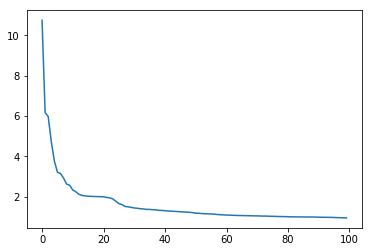

In [29]:
plt.plot(pca.explained_variance_)
plt.show()

So somewhere around 12-13 components